In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/Disease Predicition/dataset.csv")
ss = pd.read_csv('/content/drive/MyDrive/Dataset/Disease Predicition/Symptom-severity.csv')
sd = pd.read_csv('/content/drive/MyDrive/Dataset/Disease Predicition/symptom_Description.csv')
sp = pd.read_csv('/content/drive/MyDrive/Dataset/Disease Predicition/symptom_precaution.csv')

#EDA

In [ ]:
df.head()

Disease   Symptom_1  ... Symptom_16 Symptom_17
0  Fungal infection     itching  ...        NaN        NaN
1  Fungal infection   skin_rash  ...        NaN        NaN
2  Fungal infection     itching  ...        NaN        NaN
3  Fungal infection     itching  ...        NaN        NaN
4  Fungal infection     itching  ...        NaN        NaN

[5 rows x 18 columns]

In [ ]:
df.shape

(4920, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [ ]:
df.describe()

Disease  Symptom_1  ...        Symptom_16    Symptom_17
count          4920       4920  ...               192            72
unique           41         34  ...                 3             1
top     Hepatitis D   vomiting  ...   blood_in_sputum   muscle_pain
freq            120        822  ...                72            72

[4 rows x 18 columns]

In [ ]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [ ]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
len(df['Disease'].unique())

41

In [ ]:
df['Disease'].value_counts()

Hepatitis D                                120
Hypoglycemia                               120
Bronchial Asthma                           120
Alcoholic hepatitis                        120
Hyperthyroidism                            120
Hypertension                               120
Chronic cholestasis                        120
Hypothyroidism                             120
Migraine                                   120
Psoriasis                                  120
Hepatitis B                                120
Allergy                                    120
Drug Reaction                              120
Osteoarthristis                            120
AIDS                                       120
Chicken pox                                120
Hepatitis C                                120
Urinary tract infection                    120
Dimorphic hemmorhoids(piles)               120
Malaria                                    120
Dengue                                     120
Acne         

In [ ]:
df.count()

Disease       4920
Symptom_1     4920
Symptom_2     4920
Symptom_3     4920
Symptom_4     4572
Symptom_5     3714
Symptom_6     2934
Symptom_7     2268
Symptom_8     1944
Symptom_9     1692
Symptom_10    1512
Symptom_11    1194
Symptom_12     744
Symptom_13     504
Symptom_14     306
Symptom_15     240
Symptom_16     192
Symptom_17      72
dtype: int64

In [ ]:
ss['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [ ]:
vf1 = df
vf1=vf1.replace(NaN,0)

Disease  ... Symptom_17
0                            Fungal infection  ...        NaN
1                            Fungal infection  ...        NaN
2                            Fungal infection  ...        NaN
3                            Fungal infection  ...        NaN
4                            Fungal infection  ...        NaN
...                                       ...  ...        ...
4915  (vertigo) Paroymsal  Positional Vertigo  ...        NaN
4916                                     Acne  ...        NaN
4917                  Urinary tract infection  ...        NaN
4918                                Psoriasis  ...        NaN
4919                                 Impetigo  ...        NaN

[4920 rows x 18 columns]

# Data Handling

In [ ]:
df=df.fillna(0)

In [ ]:
df['Symptoms']=0
for i in range(df.shape[0]):
  values=df.iloc[i].values.tolist()
  df['Symptoms'][i]=values[1:values.index(0)]

In [ ]:
col=df.columns[1:-1]
symptoms=pd.unique(df[col].values.ravel()).tolist()
symptoms.remove(0)
symptoms

['itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 ' continuous_sneezing',
 ' shivering',
 ' chills',
 ' watering_from_eyes',
 ' stomach_pain',
 ' acidity',
 ' ulcers_on_tongue',
 ' vomiting',
 ' cough',
 ' chest_pain',
 ' yellowish_skin',
 ' nausea',
 ' loss_of_appetite',
 ' abdominal_pain',
 ' yellowing_of_eyes',
 ' burning_micturition',
 ' spotting_ urination',
 ' passage_of_gases',
 ' internal_itching',
 ' indigestion',
 ' muscle_wasting',
 ' patches_in_throat',
 ' high_fever',
 ' extra_marital_contacts',
 ' fatigue',
 ' weight_loss',
 ' restlessness',
 ' lethargy',
 ' irregular_sugar_level',
 ' blurred_and_distorted_vision',
 ' obesity',
 ' excessive_hunger',
 ' increased_appetite',
 ' polyuria',
 ' sunken_eyes',
 ' dehydration',
 ' diarrhoea',
 ' breathlessness',
 ' family_history',
 ' mucoid_sputum',
 ' headache',
 ' dizziness',
 ' loss_of_balance',
 ' lack_of_concentration',
 ' stiff_neck',
 ' depression',
 ' irritability',
 ' visual_disturbances',
 

In [ ]:
len(symptoms)

131

In [ ]:
#_me for Sunburst//run this!!!
dp = pd.merge(vf1,sp,on="Disease")
dp_split = dp.sample(frac=0.25,random_state=200)

In [ ]:
df1=pd.DataFrame(columns=symptoms,index=df.index)
df1

itching  skin_rash  ...  red_sore_around_nose  yellow_crust_ooze
0        NaN        NaN  ...                   NaN                NaN
1        NaN        NaN  ...                   NaN                NaN
2        NaN        NaN  ...                   NaN                NaN
3        NaN        NaN  ...                   NaN                NaN
4        NaN        NaN  ...                   NaN                NaN
...      ...        ...  ...                   ...                ...
4915     NaN        NaN  ...                   NaN                NaN
4916     NaN        NaN  ...                   NaN                NaN
4917     NaN        NaN  ...                   NaN                NaN
4918     NaN        NaN  ...                   NaN                NaN
4919     NaN        NaN  ...                   NaN                NaN

[4920 rows x 131 columns]

In [ ]:
df1["Symptoms"]=df['Symptoms']

In [ ]:
for i in symptoms:
  df1[i]=df1.apply(lambda x: 1 if i in x.Symptoms else 0,axis=1)

In [ ]:
df1['Disease']=df['Disease']
df1=df1.drop('Symptoms',axis=1)

In [ ]:
df1.head()

itching   skin_rash  ...   yellow_crust_ooze           Disease
0        1           1  ...                   0  Fungal infection
1        0           1  ...                   0  Fungal infection
2        1           0  ...                   0  Fungal infection
3        1           1  ...                   0  Fungal infection
4        1           1  ...                   0  Fungal infection

[5 rows x 132 columns]

# Visuals

##Symptoms vs Severity
Bar graph with highest serverity weights.


In [ ]:
ss = ss.sort_values(by='weight',ascending=False)

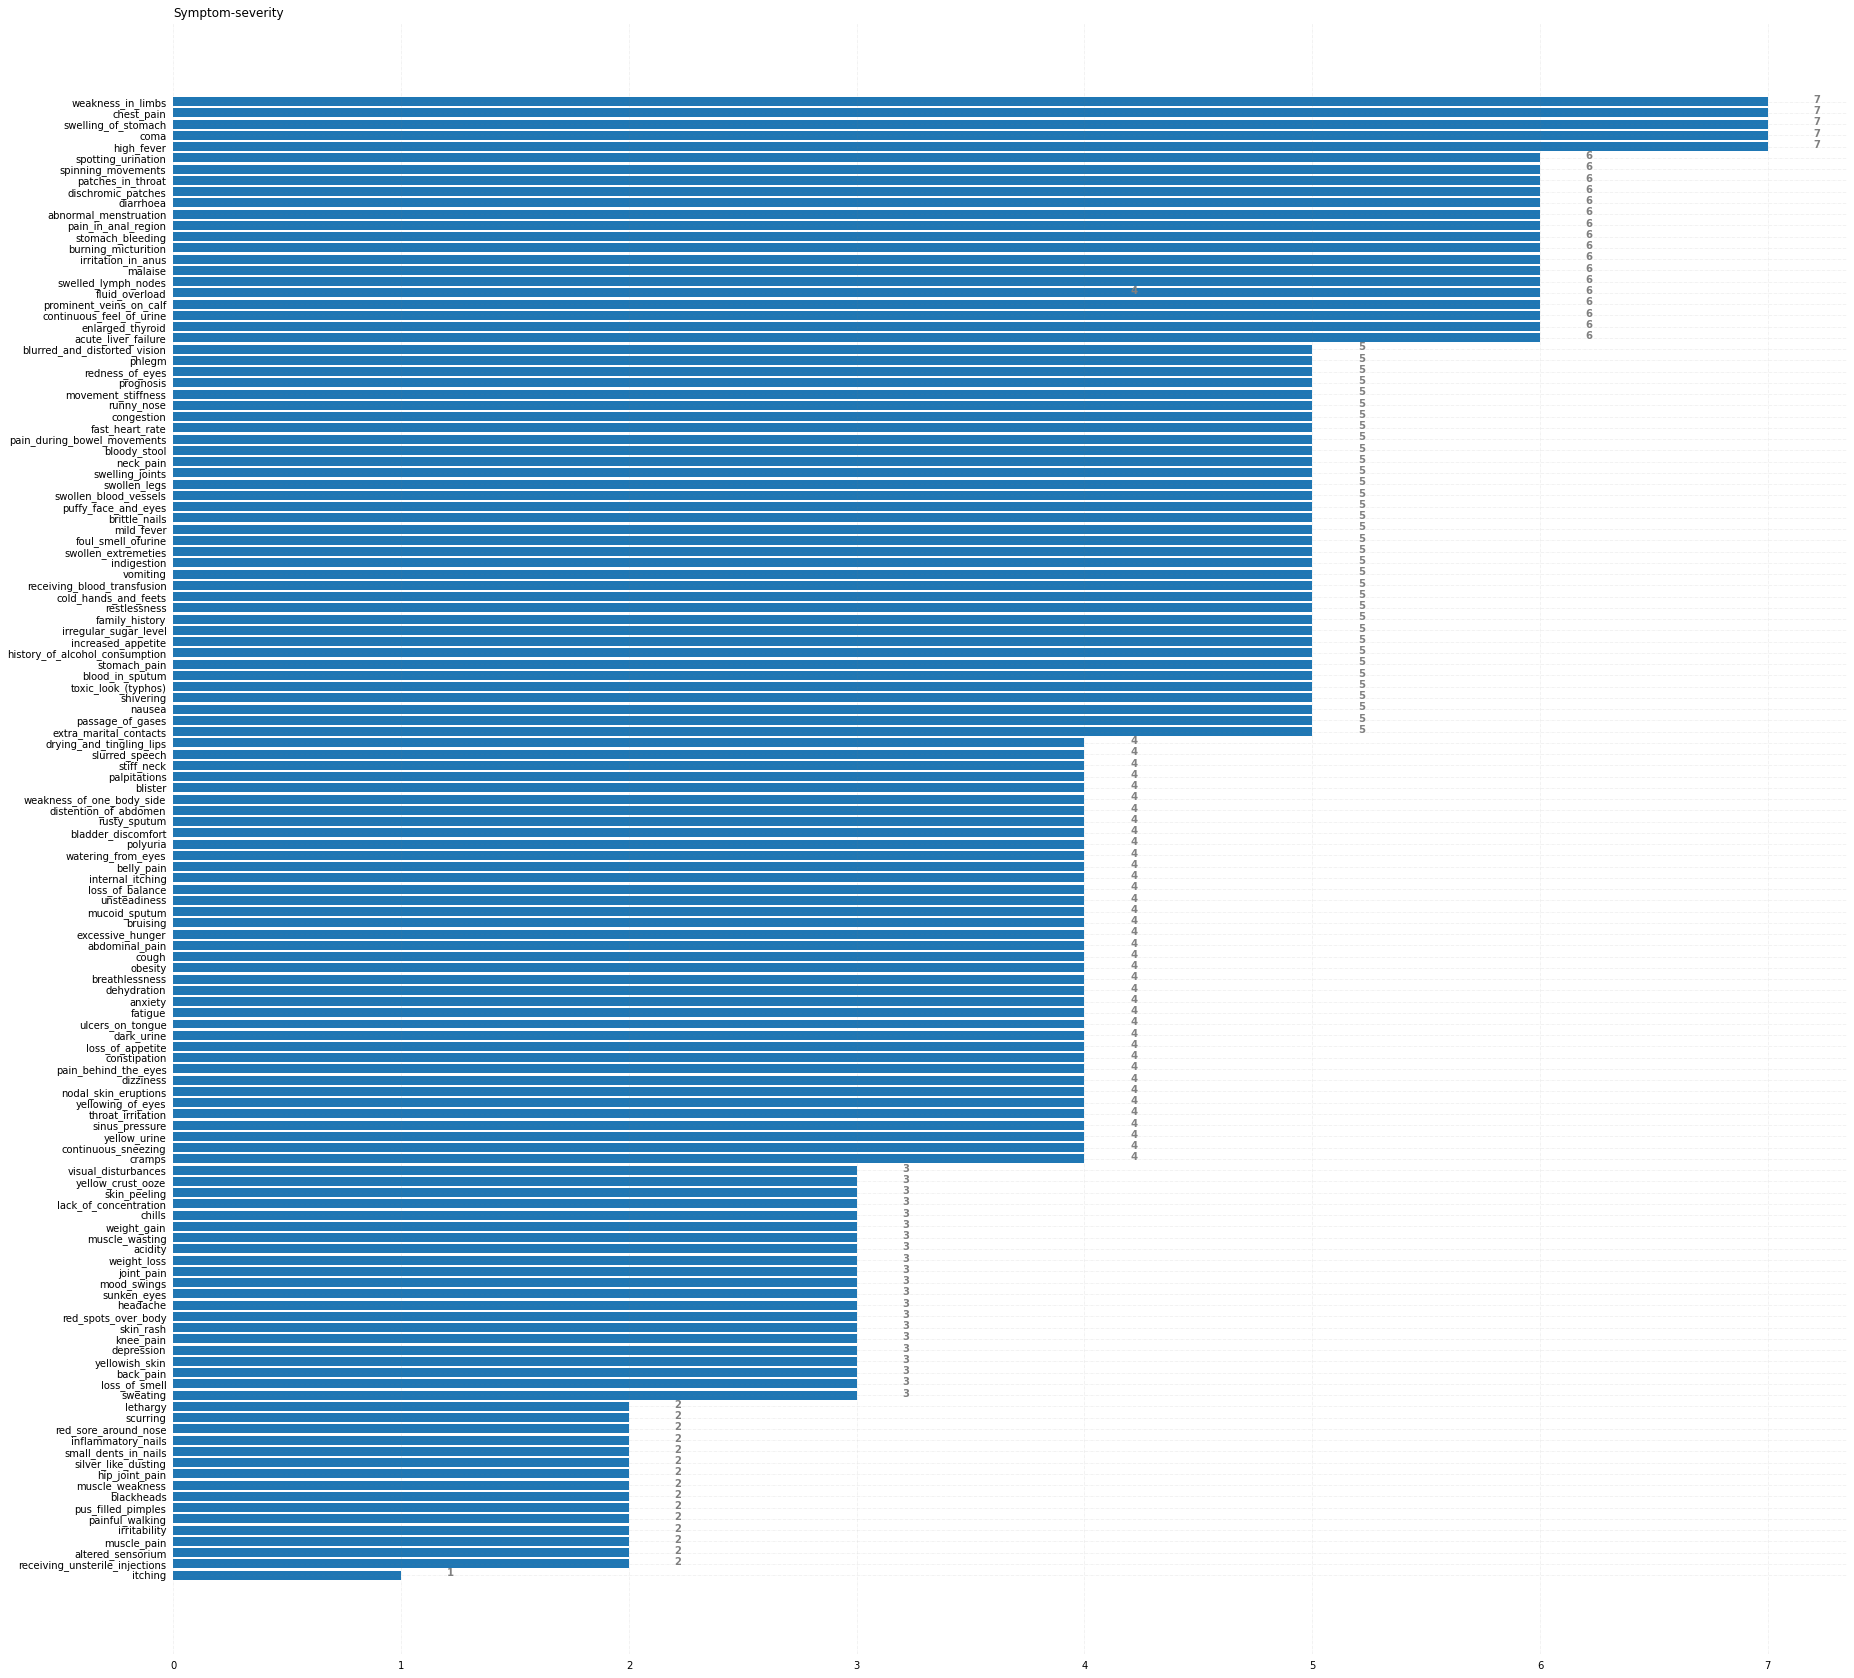

In [ ]:
x1=ss['Symptom']
y1=ss['weight']
vis1,bx1 = plt.subplots(figsize=(30,30))
bx1.barh(x1,y1)
for s in ['top','bottom','left','right']:
  bx1.spines[s].set_visible(False)

bx1.xaxis.set_ticks_position('none')
bx1.yaxis.set_ticks_position('none')


bx1.grid(b=True,color='grey',linestyle='-.',linewidth = 0.5,alpha = 0.2)
bx1.invert_yaxis()

for i in bx1.patches:
  plt.text(i.get_width()+0.2,i.get_y()+0.5,str(round((i.get_width()),2)),fontsize=10,fontweight='bold',color='grey')

bx1.set_title('Symptom-severity',loc='left',)
plt.show()

**Inference**:


from the above graph, we can infer that these 
symptoms - 
* Weakness in limbs
* chest pain 
* swelling of stomach
* high fever 
are having high severity rate(weight-7).

##Pie Chart(Symptom vs Weight)
On the basis of Severity.

In [ ]:
d = ss.groupby('weight').count()
d.insert(0,'Weight',range(1,1+len(d)))
d

Weight  Symptom
weight                 
1            1        1
2            2       15
3            3       21
4            4       39
5            5       35
6            6       17
7            7        5

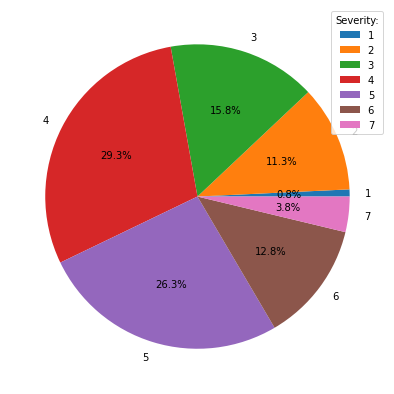

In [ ]:
x2=d['Symptom']
y2=d['Weight']
vis2 = plt.figure(figsize=(10,7))
plt.pie(x2,labels=y2,autopct="%1.1f%%")
plt.legend(title="Severity:")
plt.show()

**Inference**:

From the above pie chart we can infer that 

*   More that 50% of the symptoms lie in the severity rate of  4 and 5(according to the given data). 

* Symptoms with most severity and least severity occupy only 5%.
* And the rest covers more than 40% in total.   



##Scatter Matrix
ploting the disease and prior symptoms(till symptom_4 are recorded).

In [ ]:
plt.figure(figsize=(50,30))
vis3=px.scatter_matrix(vf1,dimensions=['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5'],color='Disease')
vis3.show()

<Figure size 3600x2160 with 0 Axes>

**Inference**:
Clustering all the symptoms in each symptom columns with unique symptom and maping with the particular disease.
From this we could infer ,picking a disease we could identify the symptoms related with different columns.

##Parallel Sets
Merging all Symptoms with respective of disease. 

In [ ]:
fig11 = px.parallel_categories(vf1,dimensions =['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11'])
fig11.show()

**Inference**:

From the above parallel set which helps or allows to compare features with several other features like disease with their respective observed symptoms  on the bases of numeric value count.



In [ ]:
vf1

Disease  ... Symptom_17
0                            Fungal infection  ...        NaN
1                            Fungal infection  ...        NaN
2                            Fungal infection  ...        NaN
3                            Fungal infection  ...        NaN
4                            Fungal infection  ...        NaN
...                                       ...  ...        ...
4915  (vertigo) Paroymsal  Positional Vertigo  ...        NaN
4916                                     Acne  ...        NaN
4917                  Urinary tract infection  ...        NaN
4918                                Psoriasis  ...        NaN
4919                                 Impetigo  ...        NaN

[4920 rows x 18 columns]

##Sunburst Graph(Radial Treemap)
which maps disease, symptom and precaution

In [ ]:
dp = pd.merge(vf1,sp,on='Disease')
dp_n=np.array_split(dp,4)
dp_n

[               Disease    Symptom_1  ...            Precaution_3      Precaution_4
 0     Fungal infection      itching  ...  keep infected area dry  use clean cloths
 1     Fungal infection    skin_rash  ...  keep infected area dry  use clean cloths
 2     Fungal infection      itching  ...  keep infected area dry  use clean cloths
 3     Fungal infection      itching  ...  keep infected area dry  use clean cloths
 4     Fungal infection      itching  ...  keep infected area dry  use clean cloths
 ...                ...          ...  ...                     ...               ...
 1225     Hypertension      headache  ...           reduce stress  get proper sleep
 1226     Hypertension      headache  ...           reduce stress  get proper sleep
 1227     Hypertension    chest_pain  ...           reduce stress  get proper sleep
 1228     Hypertension      headache  ...           reduce stress  get proper sleep
 1229     Hypertension      headache  ...           reduce stress  get prope

In [ ]:
vis5=px.sunburst(dp_n[0],path=['Disease','Symptom_2','Precaution_2'])
vis5.show()
vis6=px.sunburst(dp_n[1],path=['Disease','Symptom_2','Precaution_2'])
vis6.show()
vis7=px.sunburst(dp_n[2],path=['Disease','Symptom_2','Precaution_2'])
vis7.show()
vis8=px.sunburst(dp_n[3],path=['Disease','Symptom_2','Precaution_2'])
vis8.show()

**Inference:**

The above radial treemap represents the hierarchy levels as Disease is the parent attribute,the other two are children attributes, Symptom and precaution.

##Correlation Heatmap
for Symptoms

In [ ]:
df1

itching  ...                                  Disease
0           1  ...                         Fungal infection
1           0  ...                         Fungal infection
2           1  ...                         Fungal infection
3           1  ...                         Fungal infection
4           1  ...                         Fungal infection
...       ...  ...                                      ...
4915        0  ...  (vertigo) Paroymsal  Positional Vertigo
4916        0  ...                                     Acne
4917        0  ...                  Urinary tract infection
4918        0  ...                                Psoriasis
4919        0  ...                                 Impetigo

[4920 rows x 132 columns]

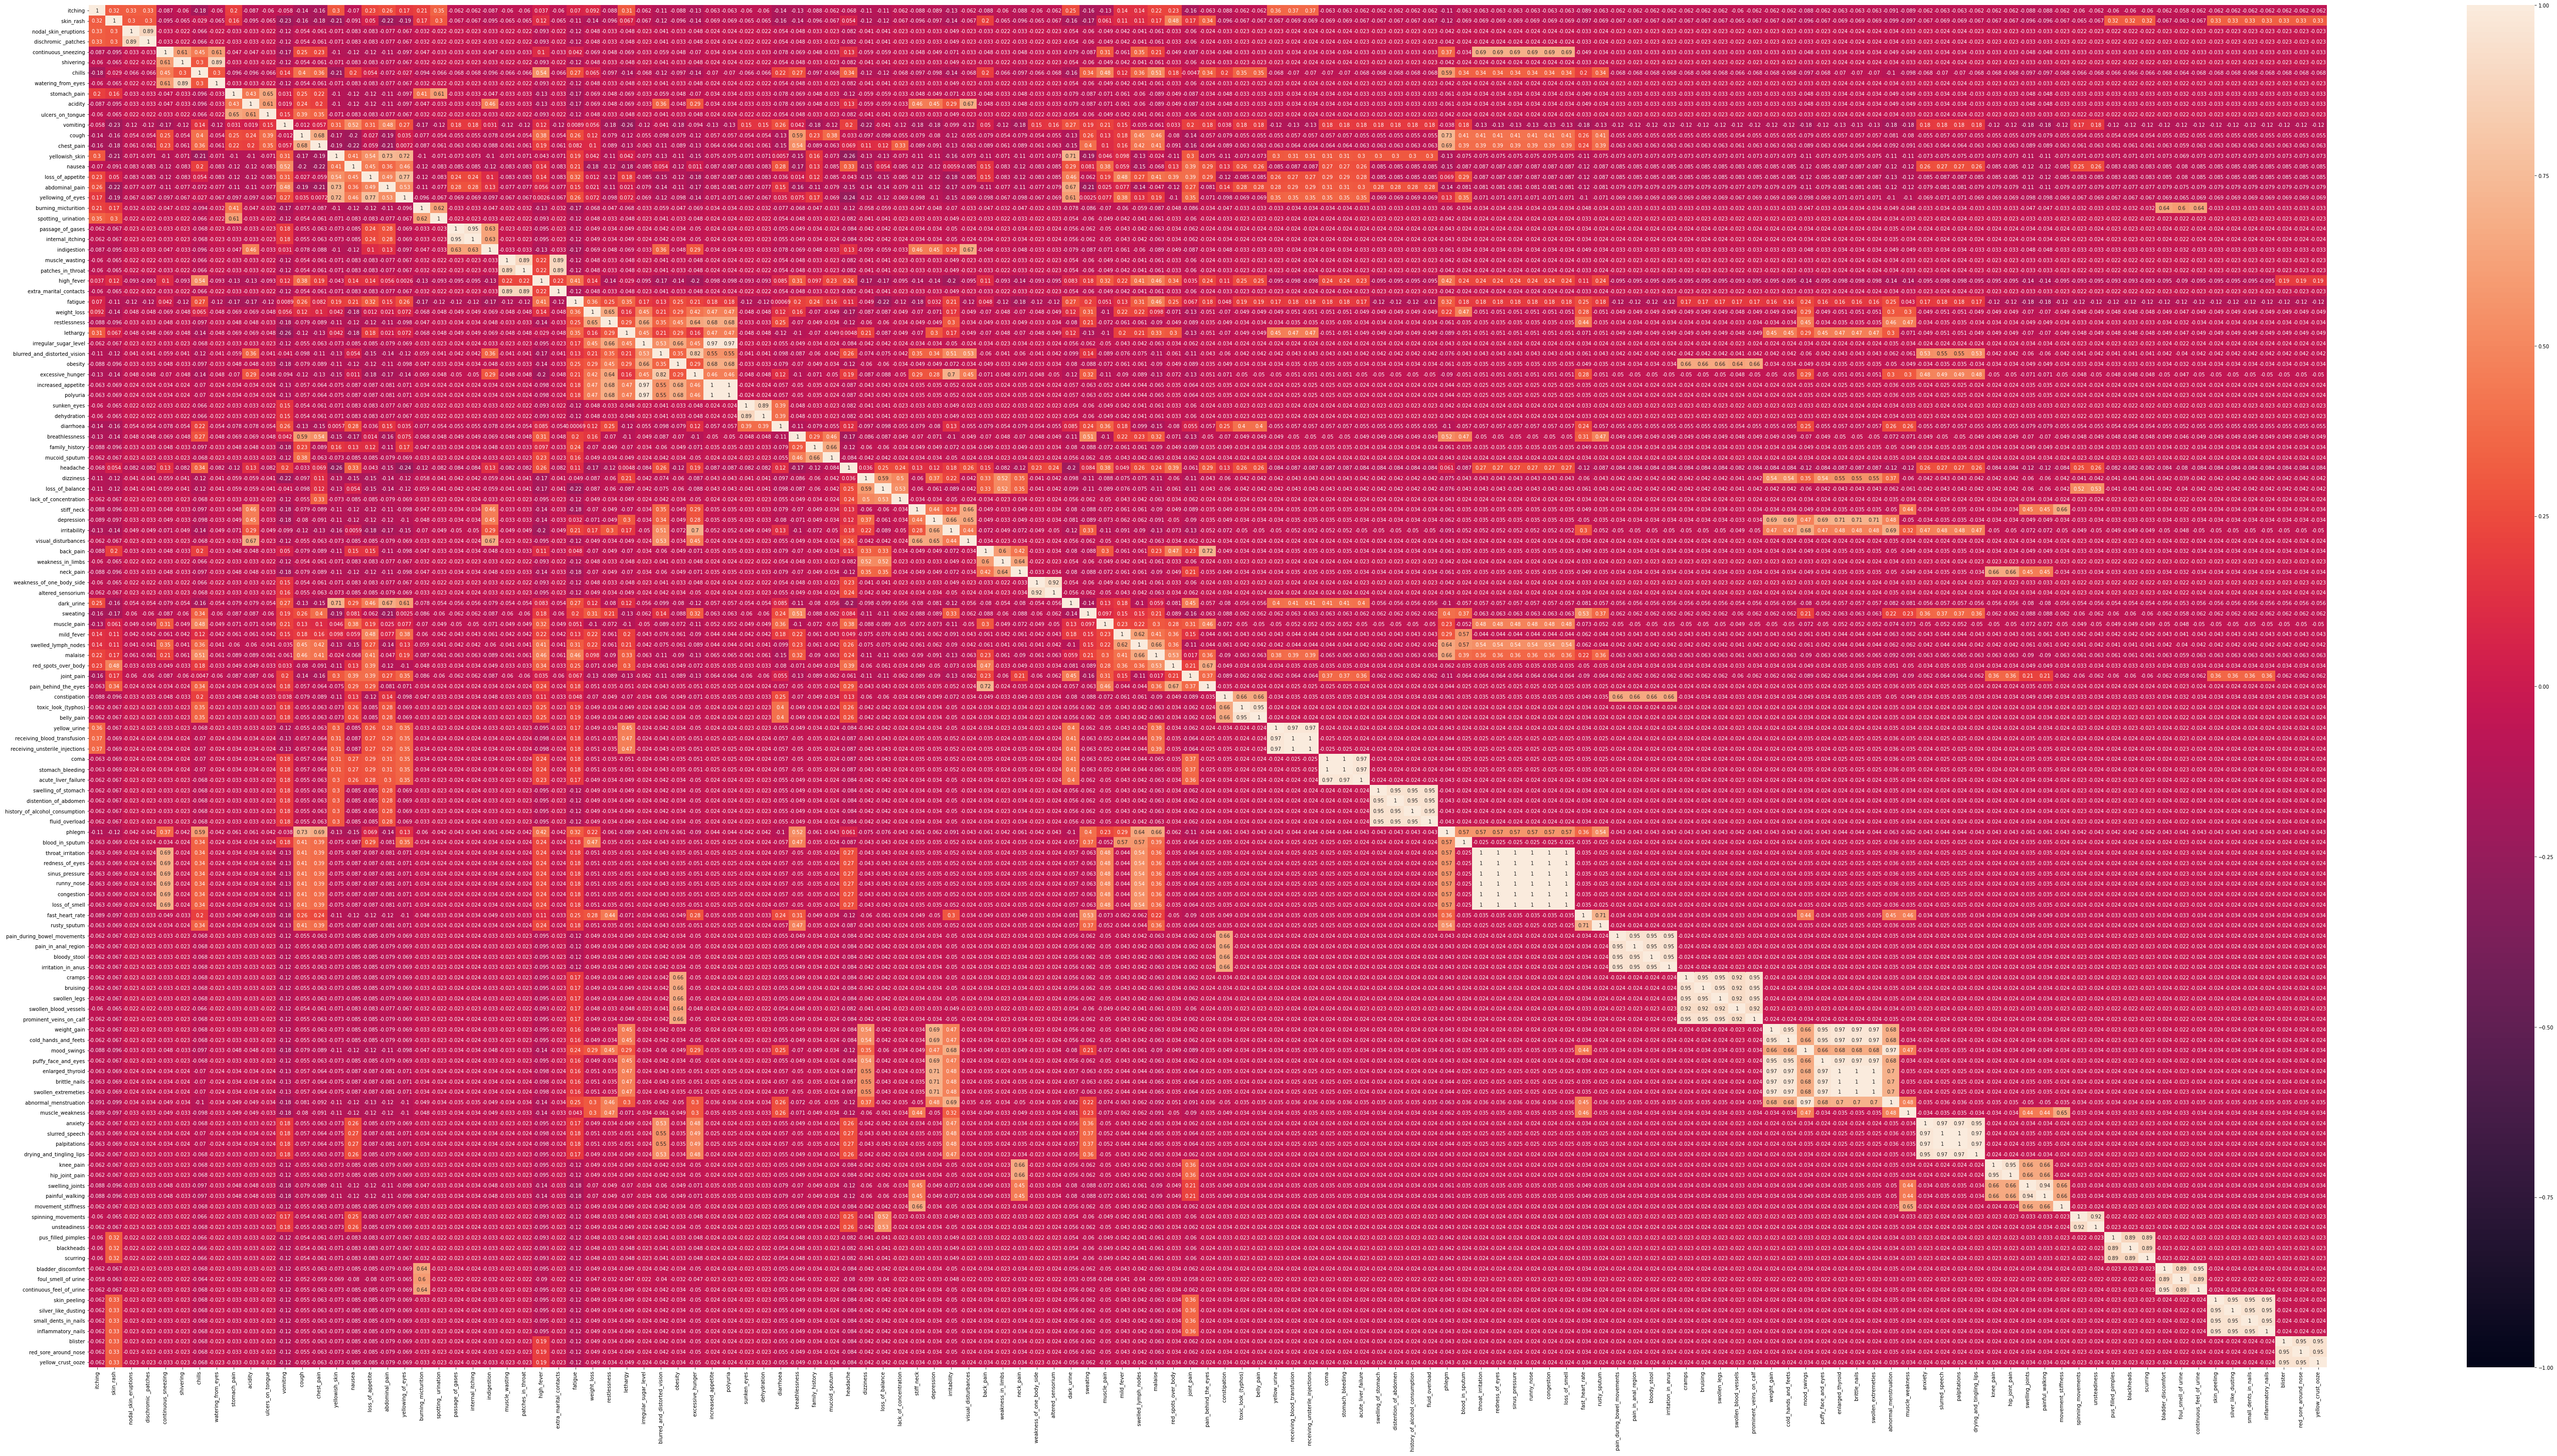

In [ ]:
corr = df1.corr()
plt.subplots(figsize=(100,50))
bx3=sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

##Covariance HeatMap
for Symptoms

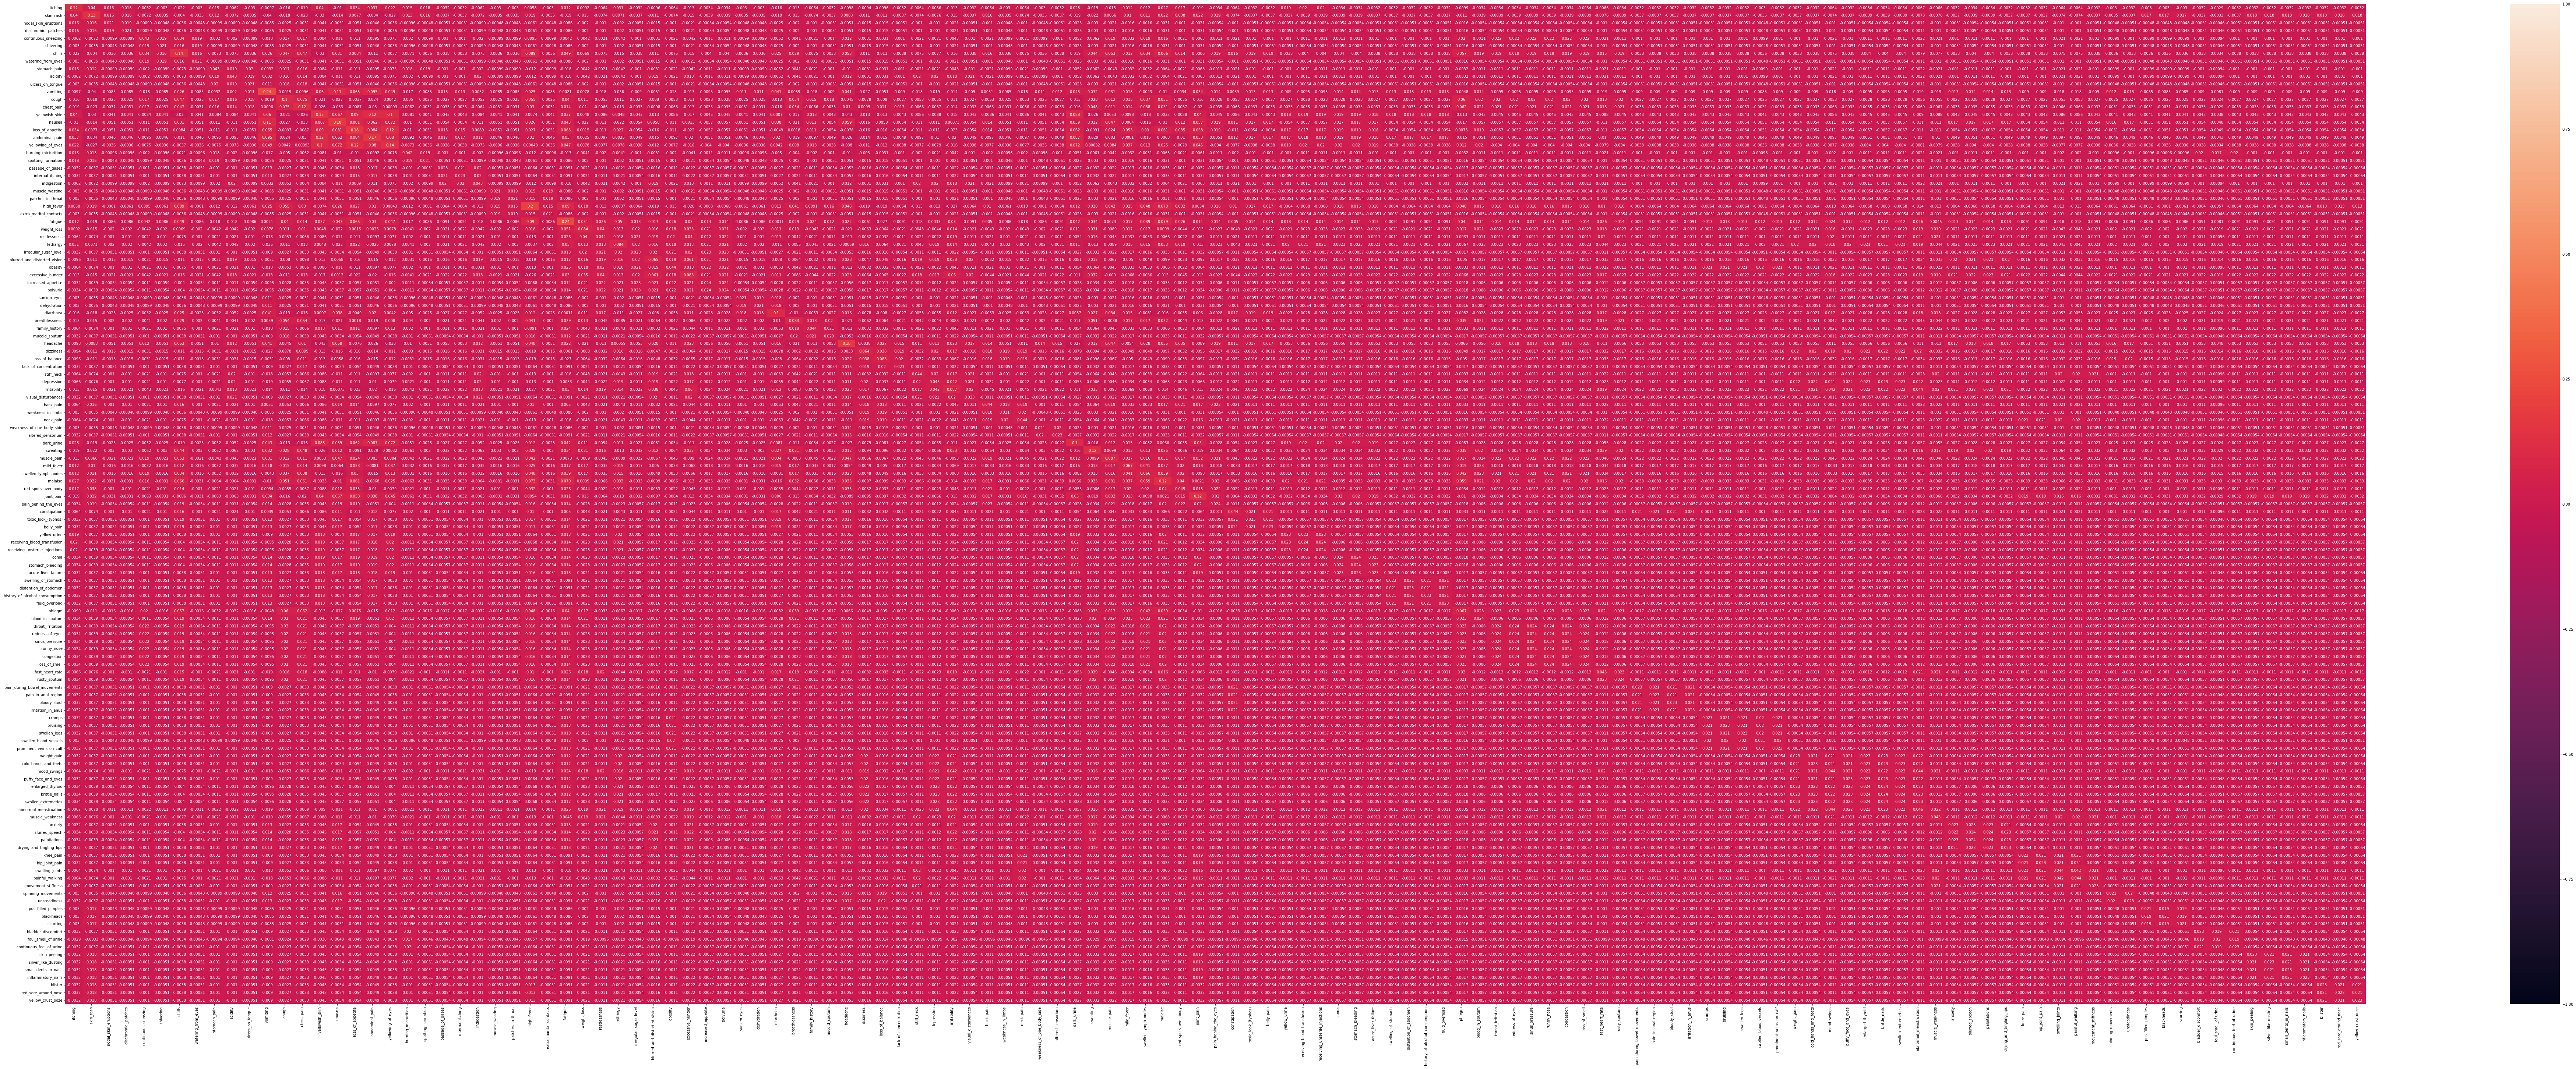

In [ ]:
cov = df1.cov()
plt.subplots(figsize=(140,50))
bx4=sns.heatmap(cov,vmin=-1,vmax=1,annot=True)

# Model

In [ ]:
from sklearn.model_selection import train_test_split
X=df1.drop(['Disease'],axis=1)
y=df1['Disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
predict_row=df1.iloc[0][:-1]
df1.iloc[0][-1]

'Fungal infection'

In [68]:
predict_row

itching                  1
 skin_rash               1
 nodal_skin_eruptions    1
 dischromic _patches     1
 continuous_sneezing     0
                        ..
 small_dents_in_nails    0
 inflammatory_nails      0
 blister                 0
 red_sore_around_nose    0
 yellow_crust_ooze       0
Name: 0, Length: 131, dtype: object

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,multi_class='multinomial')
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

1.0

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test,y_pred))

[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [ ]:
lr.predict([predict_row])

array(['Fungal infection'], dtype=object)

In [ ]:
lr.predict_proba([predict_row])

array([[1.40657007e-04, 2.94664739e-04, 1.07720509e-03, 1.38155296e-04,
        3.81754385e-04, 2.51822052e-04, 1.67047836e-04, 2.58303279e-04,
        4.03473433e-04, 5.61470883e-04, 5.39434847e-05, 6.59242994e-05,
        1.15930200e-04, 2.79021932e-04, 2.32962131e-03, 9.88846692e-01,
        1.52795144e-04, 3.21064854e-04, 2.99366257e-04, 1.36451725e-04,
        1.33443981e-04, 1.95353079e-05, 2.62678509e-05, 2.26150855e-04,
        9.37588831e-05, 6.24603160e-05, 9.54685243e-05, 7.35011627e-04,
        2.65772749e-04, 7.63625324e-05, 1.38256031e-04, 2.02326587e-04,
        2.78857319e-04, 1.54859821e-04, 8.12545034e-05, 5.46115087e-04,
        2.66843041e-05, 4.41785024e-05, 2.90121671e-04, 1.84347443e-04,
        4.34006527e-05]])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test,y_pred))

[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn.predict([predict_row])

array(['Fungal infection'], dtype=object)

In [ ]:
knn.kneighbors([predict_row])

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[ 370,  997, 1907, 1588,  422, 1906,  881, 1167,   51,  319,  787,
          455,  369]]))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
gnb=MultinomialNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

1.0

In [ ]:
gnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [ ]:
gnb.predict([predict_row])

array(['Fungal infection'], dtype='<U39')

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb2=GaussianNB()
gnb2.fit(X_train,y_train)
gnb2.score(X_test,y_test)

1.0

In [ ]:
gnb2.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
gnb2.predict([predict_row])

array(['Fungal infection'], dtype='<U39')

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

1.0

In [ ]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dtc.predict([predict_row])

array(['Fungal infection'], dtype=object)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

In [ ]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rfc.predict([predict_row])

array(['Fungal infection'], dtype=object)

#app

In [74]:
import pickle

In [75]:
data = {"model": rfc, "symptoms": symptoms  }
with open('disease_predictor.pkl', 'wb') as file:
  pickle.dump(data,file)

In [76]:
with open('disease_predictor.pkl', 'rb') as file:
  data = pickle.load(file)

In [77]:
model = data["model"]
symptoms = data["symptoms"]

In [79]:
y_hat = model.predict([predict_row])
y_hat

array(['Fungal infection'], dtype=object)